thymine 0.0
guanine 0.11057684630738523
cytosine 0.045498285541454006
uracil 0.19792557994737825
leucine 0.006604846156730987
valine 0.1938233947581829
lysine 0.23636483214724535
threonine 0.21521104177923522
tryptophan 0.01981654197187125
alanine 0.20067326342791256
methionine 0.19128412678166615
phenylalanine 0.08030949350061496
isoleucine 0.24013736656763643
cysteine 0.18656976554461657
aspartic 0.1788053569101618
glutamic 0.21155050523540891
glycine 0.16089106211397922
histidine 0.04455064510119167
asparagine 0.16610460953699893
pirrolisine 0.06650986998065819
proline 0.14617199771022796
glutammine 0.18364231339993825
arginine 0.17042993910581605
serine 0.19455788045796865
tyrosine 0.14280993768175684
2-hydroxyisobutyric acid 0.08468062148590937
Lactic acid 0.1471955094820127
glycolic acid 0.13596499083586713
2-hydroxybutyric acid 0.1567183124514384
2-hydroxy-2-methylbutyric acid 0.1488596087532427
2-hydroxy-3-methylbutyric acid 0.16828749657267839
3-hydroxybutyric acid 0.144981301

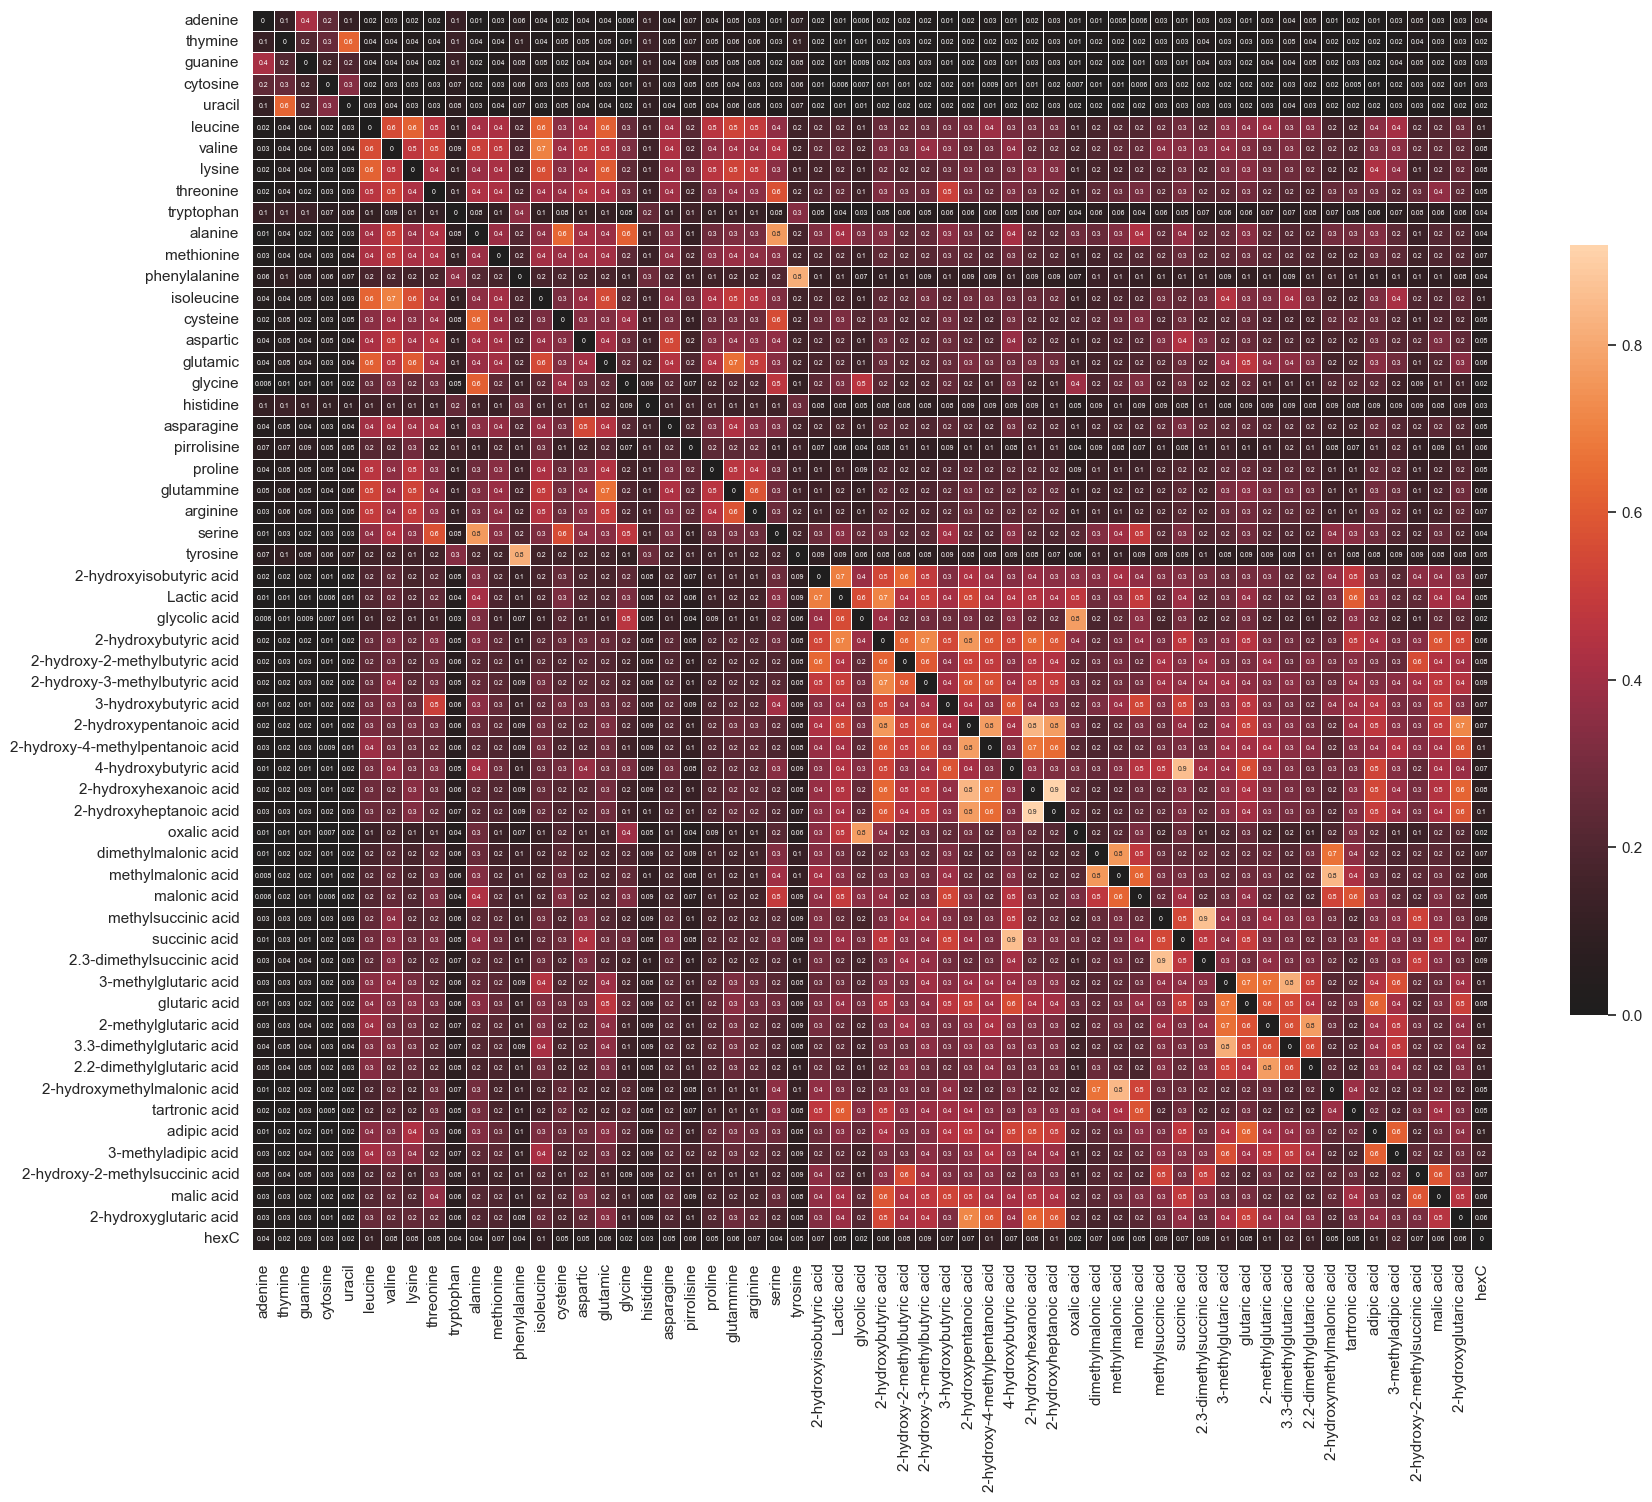

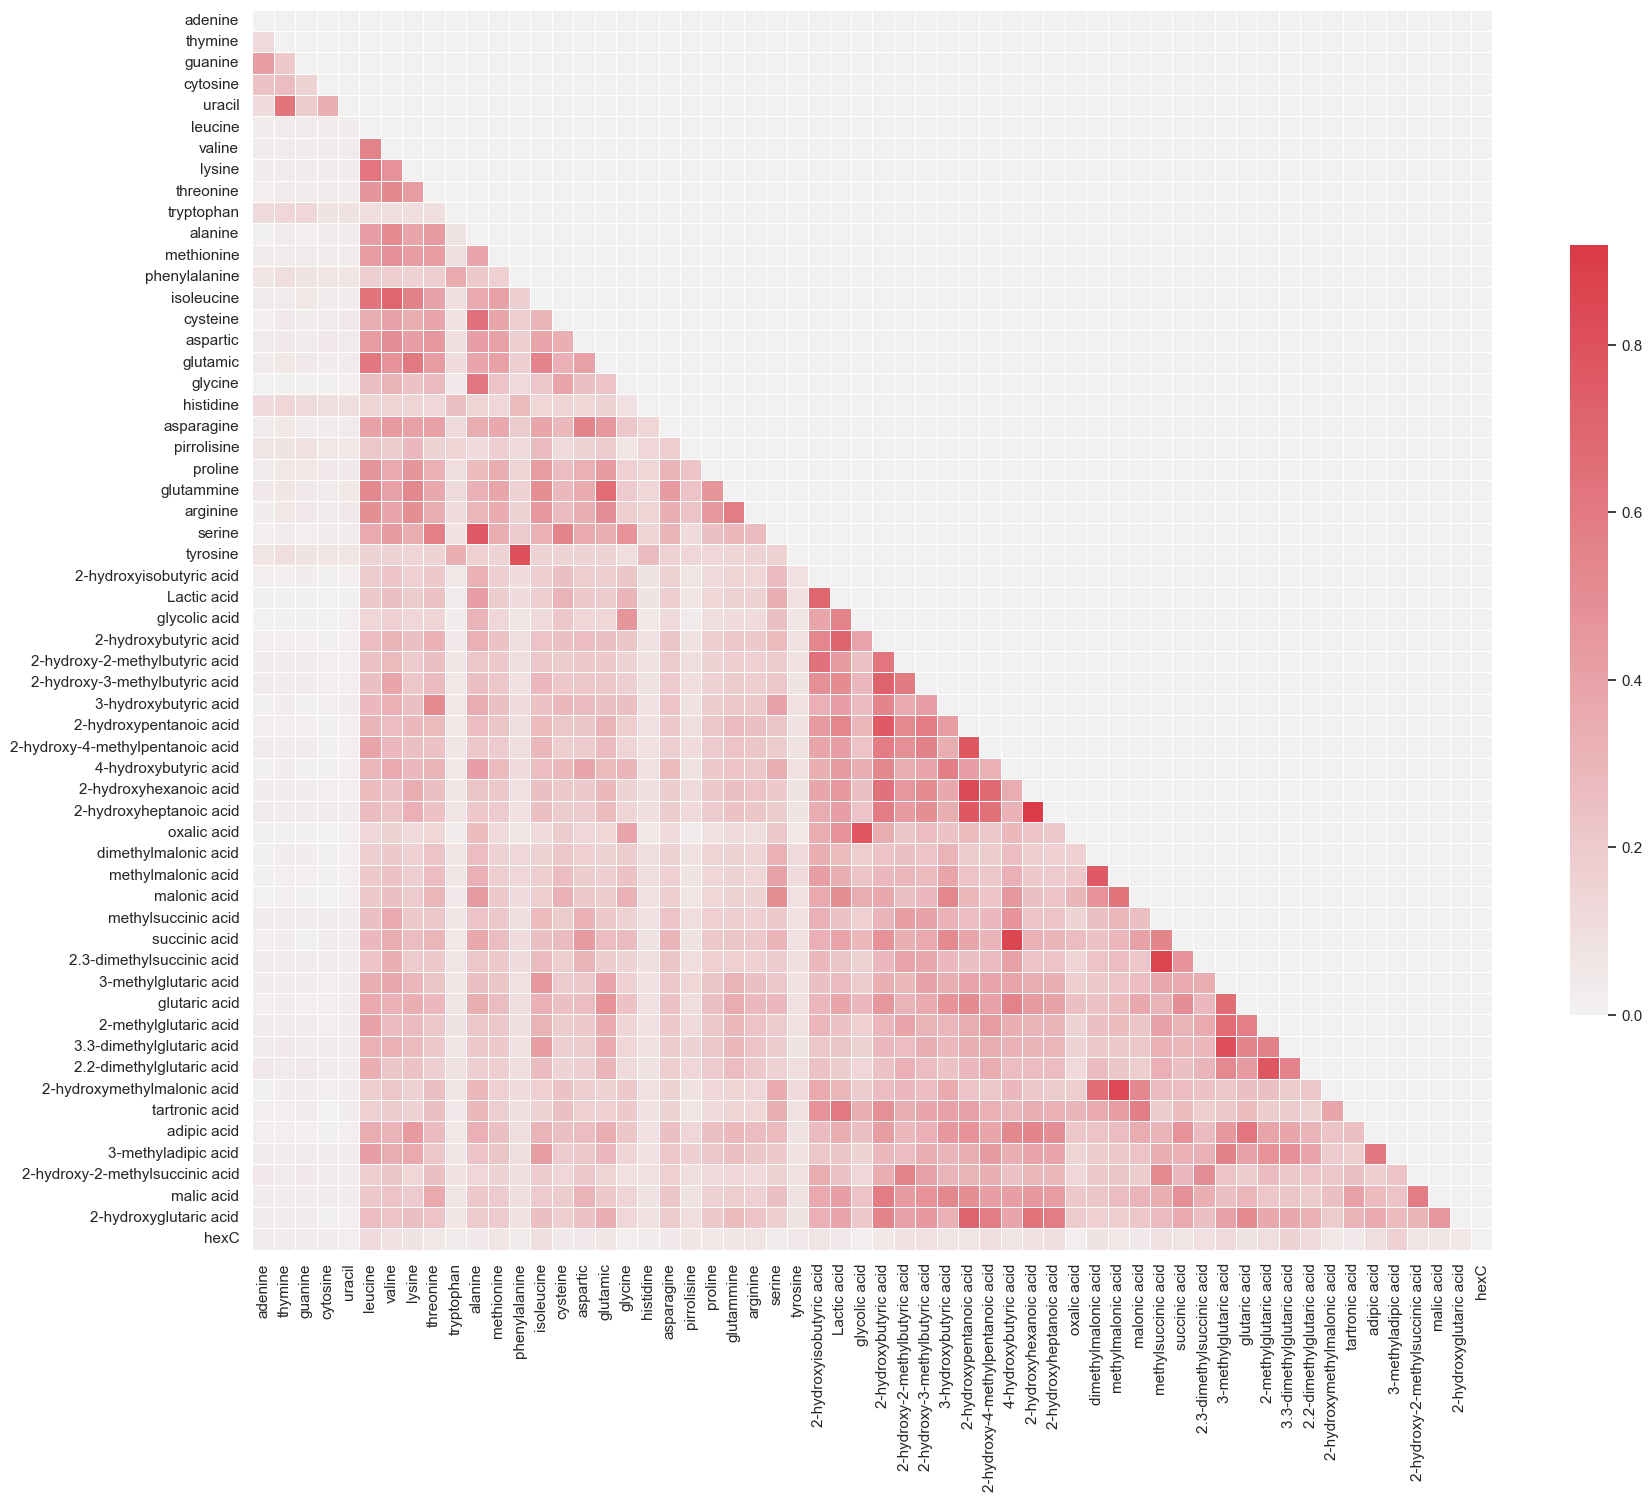

In [12]:
import time
import random
import sys
from pathlib import Path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pyplot
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import SimilarityMaps

# Show full results
np.set_printoptions(threshold=sys.maxsize)

# Read the input CSV file.
f = open("smiles2.csv","r")
ligands = f.readlines()
f.close()
ligands = ligands[1:] #remove the first line of csv file (header)

# Create arrays
molecules = []
labels = []

# Insert molecules and labels in arrays from file
for line in ligands:
    #print(line)
    line=line.split(",")
    molecules.append(Chem.MolFromSmiles(line[2]))
    labels.append(line[1])

# Create fingerprints for all molecules
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=7)
fgrps = [rdkit_gen.GetFingerprint(mol) for mol in molecules]

#print(int(fgrps[1].ToBitString(),2))
#print(int(fgrps[4].ToBitString(),2))

# Calculate number of fingerprints
nfgrps = len(fgrps)

# Define a function to calculate similarities among the molecules
def pairwise_similarity(fingerprints_list):
    global similarities
    similarities = np.zeros((nfgrps, nfgrps))
    maxdev=-1
    element=0
    maxmean=-1
    element2=0
    for i in range(1, nfgrps):
            similarity = DataStructs.BulkTanimotoSimilarity(fgrps[i], fgrps[:i])
            stdev=np.std(similarity)
            aver=np.average(similarity)
            print(labels[i],stdev)
            if stdev>maxdev:
                maxdev=stdev
                element=i
            if aver>maxmean:
                maxmean=aver
                element2=i
            similarities[i, :i] = similarity
            similarities[:i, i] = similarity
    print(maxdev,labels[element])
    print(maxmean,labels[element2])
    #return similarities

#print(similarities[1][4])

# Calculate similarities of molecules
pairwise_similarity(fgrps)
tri_lower_diag = np.tril(similarities, k=0)

# Write similarities
f = open("similarities.txt", "w")
print (similarities, file=f)
f.close()
f = open("similarities_lower_tri.txt", "w")
print (tri_lower_diag, file=f)
f.close()



def normal_heatmap(sim):
    global labels
    sns.set(font_scale=1)
    pyplot.figure(figsize=(20, 20)) # width and height in inches
    # Generate the plot
    plot = sns.heatmap(sim, annot = True, annot_kws={"fontsize":5}, center=0, fmt='.1g',
            square=True, xticklabels=labels, yticklabels=labels, linewidths=.7, cbar_kws={"shrink": .5})
    #plt.title('Heatmap of Tanimoto Similarities', fontsize = 20) # title with fontsize 20
    plt.show()
    # Save the plot
    fig = plot.get_figure()
    #fig.savefig("tanimoto_heatmap.png") 


def lower_tri_heatmap(sim):
    pyplot.figure(figsize=(20, 20)) # width and height in inches
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    lower_tri_plot = sns.heatmap(tri_lower_diag, annot = False, cmap=cmap, center=0,
            square=True, xticklabels=labels, yticklabels=labels, linewidths=.7, cbar_kws={"shrink": .5})
    #plt.title('Heatmap of Tanimoto Similarities', fontsize = 20)
    plt.show()
    fig = lower_tri_plot.get_figure()
    #fig.savefig("tanimoto_heatmap_lw_tri.png") 



# Visualize the similarities
normal_heatmap(similarities)
lower_tri_heatmap(similarities)



